In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/logistic-regression-heart-disease-prediction/framingham_heart_disease.csv


# **Uses logistic Regression**

In [2]:
df=pd.read_csv('../input/logistic-regression-heart-disease-prediction/framingham_heart_disease.csv')

In [3]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [4]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1]
for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

education: 0.0248% missing values
cigsPerDay: 0.0068% missing values
BPMeds: 0.0125% missing values
totChol: 0.0118% missing values
BMI: 0.0045% missing values
glucose: 0.0916% missing values


In [7]:
s1 = pd.isnull(df['cigsPerDay'])
df[s1]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
131,1,43,4.0,1,NaN,0.0,0,0,0,222.0,109.5,69.0,25.50,75.0,NaN,0
139,1,49,4.0,1,NaN,0.0,0,0,0,256.0,127.5,81.5,28.21,93.0,85.0,1
1046,0,49,1.0,1,NaN,0.0,0,0,0,280.0,120.0,80.0,22.33,90.0,75.0,0
1292,1,42,3.0,1,NaN,0.0,0,0,0,225.0,122.5,80.0,25.54,90.0,90.0,0
1347,0,58,4.0,1,NaN,0.0,0,1,0,270.0,195.0,117.5,23.35,75.0,NaN,0
1451,1,54,1.0,1,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1497,1,55,1.0,1,NaN,0.0,0,0,0,214.0,132.5,85.5,29.25,70.0,103.0,0
1610,0,61,1.0,1,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
1625,0,49,2.0,1,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0
1870,0,47,2.0,1,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0


In [8]:
data = df.drop(['education'], axis = 1)
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


 **Filling NAN values with their respective column mean values**

In [9]:
mean_cigsPerDay = round(data["cigsPerDay"].mean())
mean_BPmeds = round(data["BPMeds"].mean())
mean_totChol = round(data["totChol"].mean())
mean_BMI = round(data["BMI"].mean())
mean_glucose = round(data["glucose"].mean())
mean_heartRate = round(data["heartRate"].mean())

In [10]:
data['cigsPerDay'].fillna(mean_cigsPerDay, inplace = True)
data['BPMeds'].fillna(mean_BPmeds, inplace = True)
data['totChol'].fillna(mean_totChol, inplace = True)
data['BMI'].fillna(mean_BMI, inplace = True)
data['glucose'].fillna(mean_glucose, inplace = True)
data['heartRate'].fillna(mean_heartRate, inplace = True)


In [11]:
features_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1]
for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(data[feature].isnull().mean(),4)))

In [12]:
data[:].isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [13]:
data.groupby('TenYearCHD').mean()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,
0,0.410684,48.767668,0.489983,8.712577,0.023094,0.003895,0.275737,0.019199,235.193378,130.333612,82.160963,25.673826,75.762382,80.806066
1,0.532609,54.145963,0.517081,10.624224,0.063665,0.017081,0.504658,0.062112,245.271739,143.618789,86.981366,26.523199,76.529503,88.464286


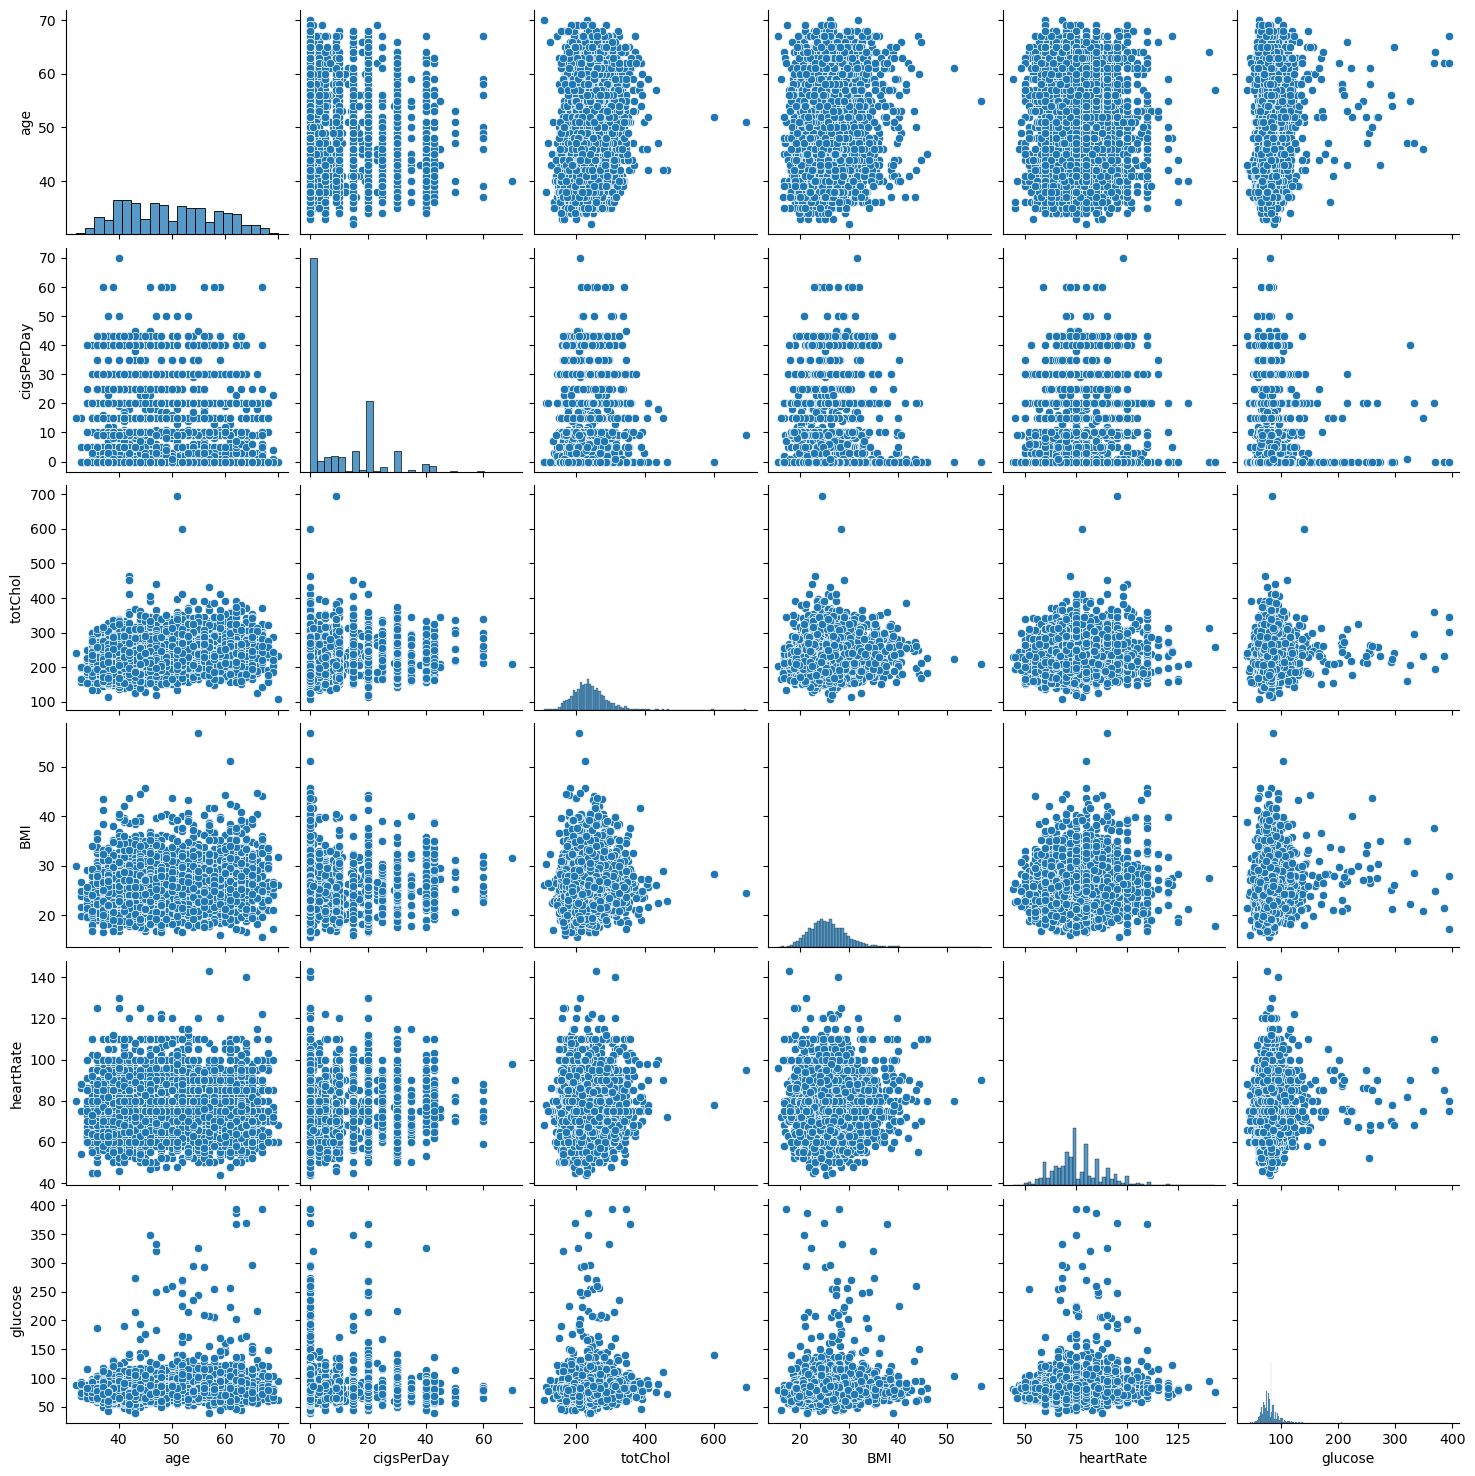

In [22]:
import seaborn as sns
sns.pairplot(data[["age","cigsPerDay","totChol"
                   ,"BMI","heartRate","glucose"]])

In [26]:
 import matplotlib.pyplot as plt

In [27]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [30]:
cols_to_be_normalized = ["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]
cols_not_to_be_normalized = ["male","currentSmoker","BPMeds","prevalentStroke","prevalentHyp","diabetes","TenYearCHD"]

normalized = normalize(data[cols_to_be_normalized])
boolean = data[cols_not_to_be_normalized]

In [32]:
df_normalized = pd.DataFrame(normalized,columns = cols_to_be_normalized)
df_boolean = pd.DataFrame(boolean,columns=cols_not_to_be_normalized)
# df_final = pd.concat([df_normalized,df_boolean],axis = 1)
# df_final = df_normalized.join(df_boolean)
df_final = df_normalized.merge(df_boolean,left_index=True, right_index=True)

In [33]:
X = df_final.drop("TenYearCHD",axis = 1)
Y = df_final["TenYearCHD"] 
X = np.array(X)
Y = np.array(Y)

In [34]:
 X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state = 1,test_size = 0.2)

In [35]:
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 
print (classification_report(y_test, y_pred))

Accuracy :  0.8632075471698113
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       733
           1       0.40      0.02      0.03       115

    accuracy                           0.86       848
   macro avg       0.63      0.51      0.48       848
weighted avg       0.80      0.86      0.81       848

